In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [63]:
# Capture Image
cap = cv2.VideoCapture(1)
_, frame = cap.read()
cv2.imwrite(f"image.jpg", frame)  

True

In [64]:
def convert_to_hsv_and_extract_channels(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    return hsv, h, s, v


In [65]:
def grayscale_histogram_equalization(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    equalized = cv2.equalizeHist(gray)
    return gray, equalized


In [66]:
def binary_inversion_threshold(img, threshold):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY_INV)
    return binary


In [67]:
def posterize_to_4_gray_levels(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    levels = np.floor(gray / 64) * 64 + 32  # Centers: 32, 96, 160, 224
    posterized = levels.astype(np.uint8)
    return posterized


In [68]:
def edge_detection_laplacian_scharr(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    scharr_x = cv2.Scharr(gray, cv2.CV_64F, 1, 0)
    scharr_y = cv2.Scharr(gray, cv2.CV_64F, 0, 1)
    scharr = cv2.magnitude(scharr_x, scharr_y)
    return np.uint8(np.abs(laplacian)), np.uint8(scharr)


In [69]:
def salt_pepper_noise_and_median_filter(img, amount=0.05):
    noisy = img.copy()
    num_salt = np.ceil(amount * img.size * 0.5).astype(int)
    num_pepper = np.ceil(amount * img.size * 0.5).astype(int)

    coords_salt = [np.random.randint(0, i - 1, num_salt) for i in img.shape[:2]]
    coords_pepper = [np.random.randint(0, i - 1, num_pepper) for i in img.shape[:2]]

    noisy[coords_salt[0], coords_salt[1]] = 255
    noisy[coords_pepper[0], coords_pepper[1]] = 0

    denoised = cv2.medianBlur(noisy, 3)
    return noisy, denoised


In [70]:
def unsharp_masking(img, amount=5, kernel_size=(5, 5)):
    blurred = cv2.GaussianBlur(img, kernel_size, 0)
    sharpened = cv2.addWeighted(img, 1 + amount, blurred, -amount, 0)
    return sharpened


In [71]:
# LAB is A color scheme designed to model human vision better.
# L - Lightness
# A - Green-Red
# B - Blue-Yellow
# I suspect these values are linked to the rods (L) and types of cones (A and B) found in our retina

def convert_to_lab_and_extract_channels(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    return lab, l, a, b


/tmp/ipykernel_46007/4005006160.py:62: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


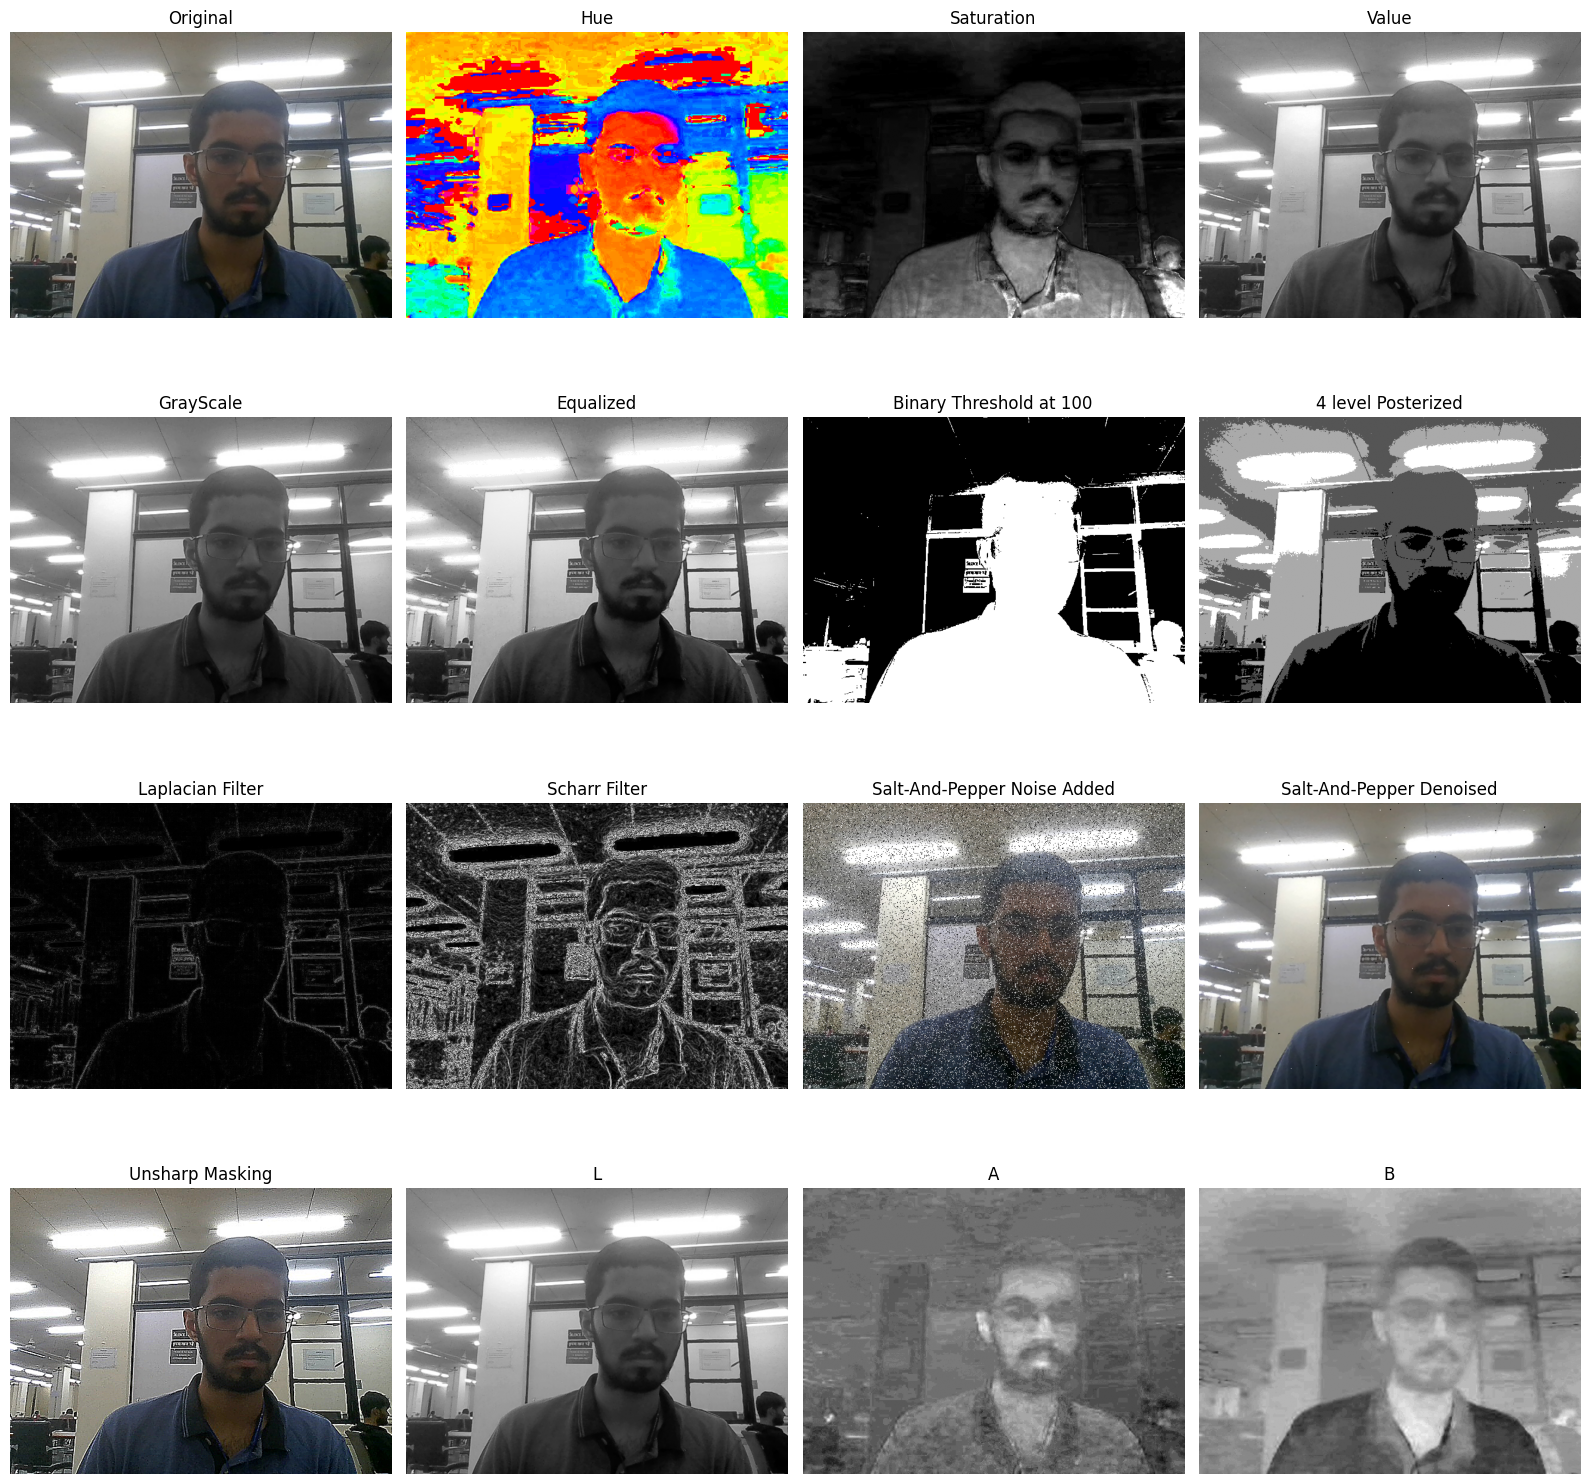

In [72]:
img = cv2.imread(f"image.jpg")
fig, axs =  plt.subplots(4,4, figsize=(16,16))

axs[0][0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0][0].set_title("Original")
hsv,hue,s,val = convert_to_hsv_and_extract_channels(img)
axs[0][1].imshow(hue, cmap="hsv")
axs[0][1].set_title("Hue")
axs[0][2].imshow(s, cmap="gray")
axs[0][2].set_title("Saturation")
axs[0][3].imshow(val, cmap="gray")
axs[0][3].set_title("Value")
img_gray, img_equalized = grayscale_histogram_equalization(img)
axs[1][0].imshow(img_gray, cmap="gray")
axs[1][0].set_title("GrayScale")
axs[1][1].imshow(img_equalized, cmap="gray")
axs[1][1].set_title("Equalized")
img_bin_thresh = binary_inversion_threshold(img, 100)
axs[1][2].imshow(img_bin_thresh, cmap="gray")
axs[1][2].set_title("Binary Threshold at 100")
img_posterized = posterize_to_4_gray_levels(img)
axs[1][3].imshow(img_posterized, cmap="gray")
axs[1][3].set_title("4 level Posterized")
img_laplace, img_scharr = edge_detection_laplacian_scharr(img)
axs[2][0].imshow(img_laplace, cmap="gray")
axs[2][0].set_title("Laplacian Filter")   
axs[2][1].imshow(img_scharr, cmap="gray")
axs[2][1].set_title("Scharr Filter") 
noisy, denoised =  salt_pepper_noise_and_median_filter(img)
axs[2][2].imshow(cv2.cvtColor(noisy, cv2.COLOR_BGR2RGB))
axs[2][2].set_title("Salt-And-Pepper Noise Added") 
axs[2][3].imshow(cv2.cvtColor(denoised, cv2.COLOR_BGR2RGB))
axs[2][3].set_title("Salt-And-Pepper Denoised") 
img_unsharp = unsharp_masking(img)
axs[3][0].imshow(cv2.cvtColor(img_unsharp, cv2.COLOR_BGR2RGB))
axs[3][0].set_title("Unsharp Masking") 
lab, l,a,b = convert_to_lab_and_extract_channels(img)
axs[3][1].imshow(l, cmap="gray")
axs[3][1].set_title("L") 
axs[3][2].imshow(a, cmap="gray")
axs[3][2].set_title("A") 
axs[3][3].imshow(b, cmap="gray")
axs[3][3].set_title("B") 

axs[0][0].axis("off")
axs[0][1].axis("off")
axs[0][2].axis("off")
axs[0][3].axis("off")
axs[1][0].axis("off")
axs[1][1].axis("off")
axs[1][2].axis("off")
axs[1][3].axis("off")
axs[2][0].axis("off")
axs[2][1].axis("off")
axs[2][2].axis("off")
axs[2][3].axis("off")
axs[3][0].axis("off")
axs[3][1].axis("off")
axs[3][2].axis("off")
axs[3][3].axis("off")
fig.tight_layout()
fig.show()

# fig, ax = plt.subplots(1,1)

# hsv, h,s,v = convert_to_hsv_and_extract_channels(img)
# # cv2.imshow("sdf",h)
# ax.imshow(s, cmap='gray')
# ax.set_title("TEST")
# fig.show()

[ WARN:0@2296.676] global loadsave.cpp:268 findDecoder imread_('task3_input/poland.jpeg'): can't open/read file: check file path/integrity


ValueError: not enough values to unpack (expected 3, got 0)

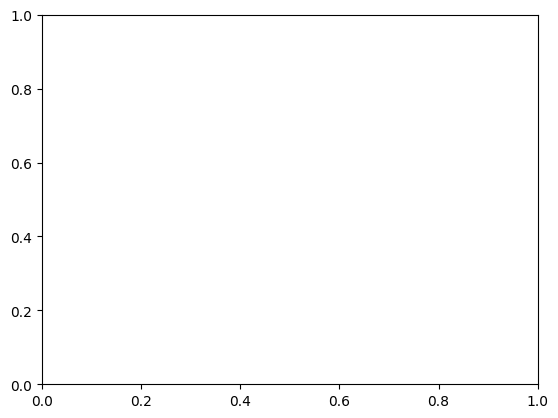

In [73]:
img = cv2.imread("task3_input/poland.jpeg")
fig,ax = plt.subplots(1,1)
b,g,r = cv2.split(img)
ax.imshow(g, cmap='Greens')
# ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
fig.show()